# Simplification d'une ligne brisée : _algorithme de Douglas-Peucker_

[Wikipedia](https://fr.wikipedia.org/wiki/Algorithme_de_Douglas-Peucker)

<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Douglas_Peucker.png" width=30%>

## Distance entre deux points et distance d'un point à une droite

**1.a.** Écrire une instruction qui permet d'importer la fonction `sqrt` du module `math`.

In [1]:
from math import sqrt

**1.b.** Supposant l'import réalisé, écrire une fonction `distance_points(a, b)` qui prend en argument deux tuples `a` et `b` représentant les coordonnées de deux points et renvoie la distance qui les sépare.

In [2]:
def distance_points(a, b):
    """
    Calcule la distance entre deux points.
    - Entrées : a, b (points représentés par un couple de coordonnées)
    - Sortie : (flottant)
    """
    return sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)

On dispose d’une fonction `distance_point_droite(p, a, b)` qui prend en argument les tuples représentant les coordonnées respectives des points `p`, `a` et `b` et qui renvoie la distance du point $P$ à la droite $(AB)$. L'exécution de cette fonction
produit une erreur dans le cas où les points $A$ et $B$ sont égaux.

In [3]:
def distance_point_droite(p, a, b):
    """
    Calcule la distance entre un point P et une droite (AB), A et B étant distincts.
    - Entrées : p, a, b (points représentés par un couple de coordonnées)
    - Sortie : (flottant)
    """
    if a == b:
        raise ValueError("a et b doivent être deux points distincts")
    u = (b[0] - a[0], b[1] - a[1])
    n = (-u[1], u[0])
    alpha, beta = n
    gamma = -alpha*a[0] -beta*a[1]
    return abs(alpha*p[0] + beta*p[1] + gamma) / sqrt(alpha**2 + beta**2)

**2.** À l'aide des fonctions `distance_points` et `distance_point_droite`, écrire une fonction `distance(p, a, b)` qui renvoie la distance entre le point $P$ et la droite $(AB)$ si les points $A$ et $B$ sont distincts et la distance ܲ$AP$ sinon.

In [4]:
def distance(p, a, b):
    """
    Calcule la distance entre un point P et une "droite" (AB), même si A et B sont confondus.
    Dans ce cas c'est la distance entre le point P et les points A et B qui est renvoyée.
    - Entrées : p, a, b (points représentés par un couple de coordonnées)
    - Sortie : (flottant)
    """
    if a == b:
        return distance_points(p, a)
    else:
        return distance_point_droite(p, a, b)

Dans la suite, on dira que la fonction `distance` calcule la distance entre le point $P$ et les points $A$ et $B$, éventuellement confondus.

## Recherche du point "le moins aligné"

On a besoin d’une fonction `le_plus_loin(ligne)` qui prend en argument une liste de tuples représentant les coordonnées des points d’une ligne polygonale.

Cette fonction doit renvoyer un tuple composé de :
- l’indice du point de coordonnées `p` de la ligne polygonale d’extrémités `deb` et `fin` pour lequel la distance `distance(p, deb, fin)` est la plus grande ;
- la valeur correspondante de cette distance.

**3.** Compléter le code suivant :

In [5]:
def le_plus_loin(ligne):
    """
    Recherche, par les points d'une ligne brisée, lequel est le plus éloigné du segment
    défini par les deux extrémités de la ligne.
    - Entrée : ligne (liste de points, représentés par un couple de coordonées)
    - Sortie : indice_max, dmax (couple composé de l'indice du point recherché dans la liste,
                                 et de la distance correspondante)
    """
    n = len(ligne)
    deb = ligne[0]
    fin = ligne[n-1]
    dmax = 0
    indice_max = 0
    for idx in range(1, n-1):
        p = ligne[idx]
        d = distance(p, deb, fin)
        if d > dmax:
            indice_max = idx
            dmax = d
    return indice_max, dmax

## Algorithme de Douglas-Peucker

**4.** Écrire une fonction `extrait(tab, i, j)` qui renvoie la copie du tableau `tab` des cases d'indice `i` inclus à `j` inclus pour 0 ≤ `i` ≤ `j` < `len(tab)`.

L'appel `extrait([7, 4, 9, 12], 2, 3)` renverra ainsi `[9, 12]`.

In [6]:
def extrait(tab, i, j):
    """
    Renvoie un tableau correspondant aux éléments compris entre les indices i et j (inclus) d'un tableau donnée.
    - Entrée : tab (tableau), i, j (entiers compris entre 0 et len(tab)-1 avec i <= j)
    - Sortie : (tableau)
    """
    return [tab[k] for k in range(i, j+1)]

L’algorithme de Douglas-Peuker est implémenté par la fonction `simplifie` ci-dessous, qui prend en argument la ligne polygonale et le seuil choisi.

**5.** Compléter le code.

In [7]:
def simplifie(ligne, seuil):
    """
    Simplifie une ligne brisée grâce à l'algorithme de Douglas-Peucker.
    - Entrées : ligne (liste de points représentés par un couple de coordonnées), seuil (flottant positif)
    - Sortie : (liste de points représentés par un couple de coordonnées)
    """
    n = len(ligne)
    if n <= 2:
        return ligne
    else:
        indice_max, dmax = le_plus_loin(ligne)
        if dmax <= seuil:
            return [ligne[0], ligne[n-1]]
        else:
            return simplifie(extrait(ligne, 0, indice_max), seuil) + simplifie(extrait(ligne, indice_max, n-1), seuil)

## Exemple avec le contour de la France

In [8]:
from annexe_douglas_peucker import comparer_avant_apres, FRANCE

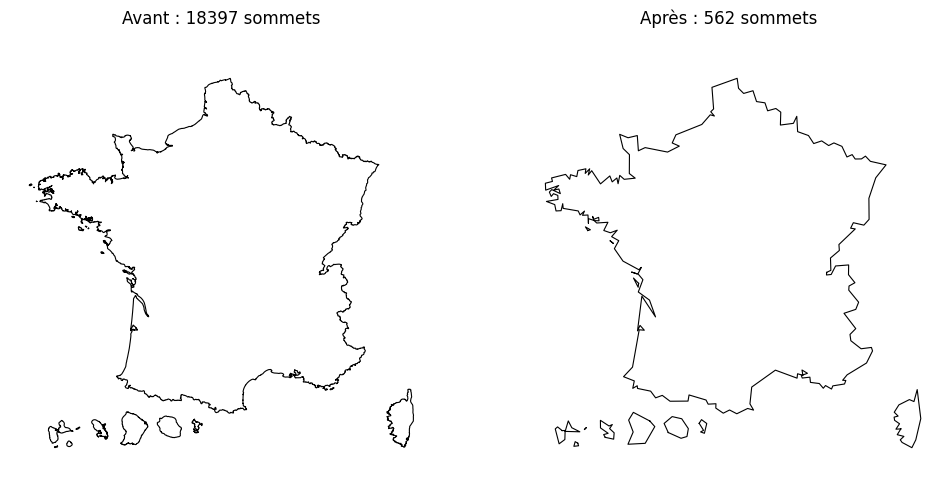

In [9]:
comparer_avant_apres(FRANCE, simplifie, 1)